In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import bisect

In [2]:
def original_function(x):
    return math.cos(x)


def taylor_function(f, x, delta_x, n):
    dx = 1e-5
    result = 0
    for i in range(n):
        deriv = 0
        #using numerical differentiation (Grünwald–Letnikov derivative)
        for j in range (i+1):
            deriv = deriv + (-1)**(j)*math.comb(i,j)*f(x+(i-j)*dx)
        deriv = deriv / (dx)**i
        
        result = result + deriv*delta_x**i/math.factorial(i)
    return result

#simulate using 6 terms
print("Now, we calculate f(6.1) using actual value and taylor approximation")
print("Actual Value =", original_function(6.1))
print("Taylor Approximation: ")
for n in range(1,7):
    approx = taylor_function(original_function, 6, 0.1, n)
    print ("number of terms= " , n, " | Approximation value= ", approx, " | Difference with the actual value= ", approx - original_function(6.1))


Now, we calculate f(6.1) using actual value and taylor approximation
Actual Value = 0.9832684384425845
Taylor Approximation: 
number of terms=  1  | Approximation value=  0.960170286650366  | Difference with the actual value=  -0.023098151792218524
number of terms=  2  | Approximation value=  0.9881113563838385  | Difference with the actual value=  0.004842917941254021
number of terms=  3  | Approximation value=  0.9833105022251788  | Difference with the actual value=  4.206378259430377e-05
number of terms=  4  | Approximation value=  0.9832179836397934  | Difference with the actual value=  -5.045480279108894e-05
number of terms=  5  | Approximation value=  1.399551617874227  | Difference with the actual value=  0.4162831794316426
number of terms=  6  | Approximation value=  -2681.639424559587  | Difference with the actual value=  -2682.62269299803


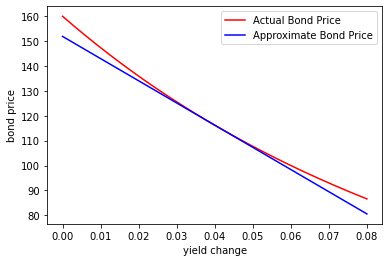

In [3]:
#Define the following terminology
#T: Maturity
#y: Yield to Maturity (YTM)
#f: Face value
#r: Coupon rate

def price(T,y,f,r):
    time = np.arange(1,T+1)
    coupon_pv = f*r/(1+y)**time
    face_pv = f/(1+y)**T
    price =  coupon_pv.sum() + face_pv
    return price

def dollar_duration(T,y,f,r):
    time = np.arange(1,T+1)
    #take care of the coupon first
    d1 = -time*r*f/(1+y)**(time+1)
    #take care of the face value
    d2 = -T*f/(1+y)**(T+1)
    total = d1.sum()+d2
    return total

# Let we have a bond that offer 6% coupon rate, 4% YTM, 10 years maturity, and $100 face value
T = 10
y = 0.04
f = 100
r = 0.06

x_axis = np.linspace(0,0.08,8000)
d_duration = dollar_duration(T,y,f,r)
bond_price_base = price (T,y,f,r)

actual_bond_price = []
approximate_bond_price = []

for y_change in x_axis:
    actual_bond_price.append(price(T,y_change,f,r))
    approximate_bond_price.append((bond_price_base + d_duration*(y_change-y)))
    
plt.plot(x_axis,actual_bond_price,color ="red", label ="Actual Bond Price")
plt.plot(x_axis,approximate_bond_price, color ="blue", label = "Approximate Bond Price")
plt.legend()
plt.xlabel("yield change")
plt.ylabel("bond price")
plt.show()

In [4]:
#using bisection method
#let p = 1000

zero_rate = np.array((0.04, 0.0425, 0.0475, 0.049, 0.05))
maturity = np.array((1,2,3,4,5))

#let the annual coupon is 5%
cf = np.array([50,50,50,50,1050])

def bond_price (cf,rate,time):
    x = (cf/((1+rate)**time)).sum()
    return x

bond_price1 = bond_price(cf,zero_rate,maturity)

#we use price function declared in question 1b
def function(y):
    return (bond_price1 - price(5,y,1000,0.05))

yieldToMaturity = bisect(function, 0, 1)
print("The yield to maturity (YTM) using the bisection method is ", yieldToMaturity)

The yield to maturity (YTM) using the bisection method is  0.04963546685939946


In [5]:
#Since there is a 0.25% percent in each coupon increase, we have the new bond price as follows:

bond_price2 = bond_price(cf,zero_rate+0.0025,maturity)
def function2(y):
    return (bond_price2 - price(5,y,1000,0.05))
yieldToMaturiry2 = bisect(function2, 0, 1)
pnl = (bond_price2-bond_price1)/bond_price1

#calculate the approximate unrealised profit/loss using the dollar duration
approx_price_change = 0.0025 * dollar_duration(5,yieldToMaturity,1000,0.05)
approx_price = approx_price_change + bond_price1                                   
approx_pnl = (approx_price - bond_price1)/bond_price1

print("The new bond price is ", bond_price2)
print("The new yield to maturity (YTM) using the bisection method is ", yieldToMaturiry2)

print("\n")
print("The actual unrealised PnL (percentage) is ",pnl,"\n")
print("Using dollar duration, we have the following result:")
print("The approximate new bond price is ",approx_price)
print("The approximate unrealised PnL (percentage) is ",approx_pnl)

The new bond price is  990.8188797667353
The new yield to maturity (YTM) using the bisection method is  0.05213312721934926


The actual unrealised PnL (percentage) is  -0.01074397594211746 

Using dollar duration, we have the following result:
The approximate new bond price is  990.734297937822
The approximate unrealised PnL (percentage) is  -0.010828424356945837
